In [8]:
import random
import names
import matplotlib.pyplot as plt
%matplotlib inline  

In [9]:
class Predictor(object):
    """
    The predictor attemps to guess what the generator will produce.
    He gains a point if he predicts accurately and looses one if he doesn't
    """
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.scores = []
        self.gameScore = 0
        self.lastScore = 0
        # make players start with some rules
    
    def getNewRule(self, possiblePreRules):
        self.rules.append(random.choice(random.choice(possiblePreRules)) + '-' + str(random.randint(0,1)))
        self.rules.sort(lambda x,y: cmp(len(y), len(x)))
        #print self.rules
    
    def getLastScore(self):
        if len(self.scores) > 2:
            return self.scores[-2]
        return 0
    
    def getCurrentScore(self):
        if len(self.scores) > 1:
            return self.scores[-1]
        return 0
        
    def predict(self, generator):
        #generator.sequence
        
        def areEquivalent(rs, gc):
            rs = list(rs)
            gc = list(gc)
            for i in xrange(0,len(gc)):
                if rs[i] == 'X':
                    rs[i] = gc[i]
            if rs == gc:
                #print str(True),rs,gc
                return True
            #print str(False),rs,gc
            return False
                    
        #print generator.sequence
        for rule in self.rules:
            ruleSeq = rule.split('-')
            genChunk = generator.sequence[-len(ruleSeq[0]):]
            if areEquivalent(ruleSeq[0], genChunk):
                #print "rule predicting", ruleSeq[0], genChunk, ruleSeq[1]
                return ruleSeq[1]
        #print "random predicted"
        return str(random.randint(0,1))
    
    def predictorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.scores + [self.gameScore]
        #self.lastScore = self.gameScore
        self.gameScore = 0
        
    def mutate(self):
        self.rules.append(random.choice(random.choice(possiblePreRules)) + '-' + str(random.randint(0,1)))
        del self.rules[random.randint(1,len(self.rules))-1]
        self.rules.sort(lambda x,y: cmp(len(y), len(x)))
        
    def crossover(self, secondParent):
        firstHalf = self.rules[0:len(self.rules)]
        secondHalf = secondParent.rules[len(secondParent.rules):]
        self.rules = firstHalf + secondHalf
        return self
        
                
        
    
    
def createAllPreRules(length):
    def createAllBin(thelist, length):
        if length == 0:
            allpossibilities.append(thelist)
        else:
            if random.random() < 0.9:
                createAllBin(thelist+'1', length-1)
            else:
                createAllBin(thelist+'X', length-1)
            if random.random() < 0.9:
                createAllBin(thelist+'0', length-1)
            else:
                createAllBin(thelist+'X', length-1)

    allpossibilities = []

    for i in range(1,length):
        createAllBin('', i)

    formatedpossibilities = []
    for i in range(0,length-1):
        formatedpossibilities.append([])
    for i in allpossibilities:
        formatedpossibilities[len(i)-1].append(i)

    return formatedpossibilities

possiblePreRules = createAllPreRules(10)

In [10]:
import random

class Generator(object):
    """
    The generator generates a string of 1's and 0's.
    If the predictor has accurately predicted his next element he looses a point, and if not he gains one
    """
    possibleRules = []
    
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.sequence = ''
        self.gameScore = 0
        self.lastScore = 0
        self.scores = []
        
    def generate(self):
        
        for rule in self.rules:
            ruleSeq = rule.split('-')
            if ruleSeq[0] == self.sequence[-len(ruleSeq):]:
                #print "rule generated",rule
                self.sequence += rule[1]
                return rule[1]
        nextItem = str(random.randint(0,1))
        self.sequence += nextItem
        #print "random generated", nextItem
        return nextItem
    
    def getLastScore(self):
        if len(self.scores) > 2:
            return self.scores[-2]
        return 0
    
    def getCurrentScore(self):
        if len(self.scores) > 1:
            return self.scores[-1]
        return 0
        
    def getNewRule(self, possibleGenRules):
        self.rules.append(random.choice(random.choice(possibleGenRules)) + '-' + str(random.randint(0,1)))
        self.rules.sort(lambda x,y: cmp(len(y), len(x)))
        #print self.rules
        
    def generatorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.scores + [self.gameScore]
        #self.lastScore = self.gameScore
        self.gameScore = 0
        
    def mutate(self):
        self.rules.append(random.choice(random.choice(possibleGenRules)) + '-' + str(random.randint(0,1)))
        del self.rules[random.randint(1, len(self.rules))-1]
        self.rules.sort(lambda x,y: cmp(len(y), len(x)))
        
    def crossover(self, secondParent):
        firstHalf = self.rules[0:len(self.rules)]
        secondHalf = secondParent.rules[len(secondParent.rules):]
        self.rules = firstHalf + secondHalf
        return self
        
            
def createAllGenRules(length):
    def createAllBin(thelist, length):
        if length == 0:
            allpossibilities.append(thelist)
        else:
            createAllBin(thelist+'1', length-1)
            createAllBin(thelist+'0', length-1)

    allpossibilities = []

    for i in range(1,length):
        createAllBin('', i)

    formatedpossibilities = []
    for i in range(0,length-1):
        formatedpossibilities.append([])
    for i in allpossibilities:
        formatedpossibilities[len(i)-1].append(i)

    return formatedpossibilities

possibleGenRules = createAllGenRules(10)
    


In [14]:
def fitness(player): 
    return player.getCurrentScore() * 0.7 + player.getLastScore() * 0.3

In [29]:
def playGame(numberOfPlayers, numOfGenerations):
    predictionTeam = []
    generationTeam = []
    
    genchampfitness = []
    prechampfitness = []
    
    genAvgfitness = []
    preAvgfitness = []
    
    for i in range(numberOfPlayers):
        newPred = Predictor()
        newGen = Generator()
        predictionTeam.append(newPred)
        generationTeam.append(newGen)
    PreChamp = random.choice(predictionTeam)
    GenChamp = random.choice(generationTeam)
    print PreChamp.rules
    
    for generation in xrange(0, numOfGenerations):
        for move in xrange(0,100):
            championPrediction = PreChamp.predict(GenChamp)
            championGeneration = GenChamp.generate()
            for predPlayer in predictionTeam:
                playerPrediction = predPlayer.predict(GenChamp)
                if playerPrediction == championGeneration:
                    predPlayer.predictorWins()
            for genPlayer in generationTeam:
                playerGeneration = genPlayer.generate()
                if playerGeneration != championPrediction:
                    genPlayer.generatorWins()

        predictionTeam = sorted(predictionTeam, key=lambda player: fitness(player) , reverse = True)
        generationTeam = sorted(generationTeam, key=lambda player: fitness(player) , reverse = True)
        
        PreChamp = predictionTeam[0]
        GenChamp = generationTeam[0]
        print PreChamp.rules

        for i in xrange(1, int(numberOfPlayers/2)):
            predictionTeam[i].mutate()
            generationTeam[i].mutate()

        predictorsToXover = predictionTeam[int(numberOfPlayers/2):numberOfPlayers]
        generatorsToXover = generationTeam[int(numberOfPlayers/2):numberOfPlayers]
        for i in xrange(int(numberOfPlayers/2), numberOfPlayers):
            predictionTeam[i] = random.choice(predictorsToXover).crossover(random.choice(predictorsToXover))
            generationTeam[i] = random.choice(generatorsToXover).crossover(random.choice(generatorsToXover))

        genchampfitness.append(fitness(PreChamp))
        prechampfitness.append(fitness(GenChamp))
        
        #add average fitness
        
        genAvgfitness.append(sum(fitness(player) for player in predictionTeam)/len(predictionTeam))
        preAvgfitness.append(sum(fitness(player) for player in generationTeam)/len(generationTeam))
        #sum(c.A for c in c_list)
        
        #print "Predictor champion fitness : " + str(fitness(PreChamp))
        #print "Generator champion fitness : " + str(fitness(GenChamp))
        
        for i in generationTeam:
            i.newGame()
        for i in predictionTeam:
            i.newGame()
        
        
    plt.plot(genchampfitness, label='Generator Champ Fitness')
    plt.plot(prechampfitness, label='Predictor Champ Fitness')
    plt.plot(genAvgfitness, label='Generator Average Fitness')
    plt.plot(preAvgfitness, label='Predictor Average Fitness')    
    plt.ylabel('Fitness')    
    plt.xlabel('Generation')
    plt.show()
    
        # keep top x% players
        # mutate and Xover parents
        # get new Population
        # play again

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


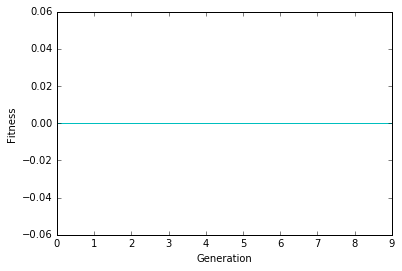

In [30]:
playGame(100,10)